Writeup

By: Patrick Chenglo
24258216

Discussed with Amy Shu, Ricky Liang, Michael Chen


Problem 1: See code below. 

Problem 2: 


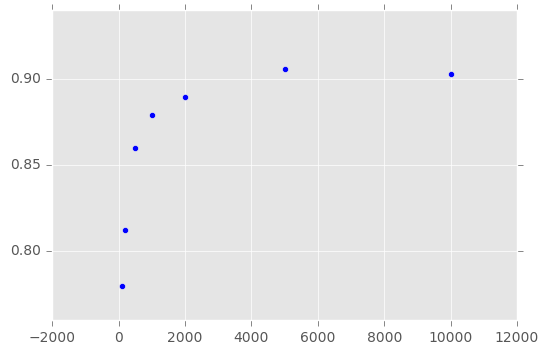

In [37]:
#MNIST Scatter Plot

plt.scatter(mnistsamples, mnist_percentages)
plt.show()

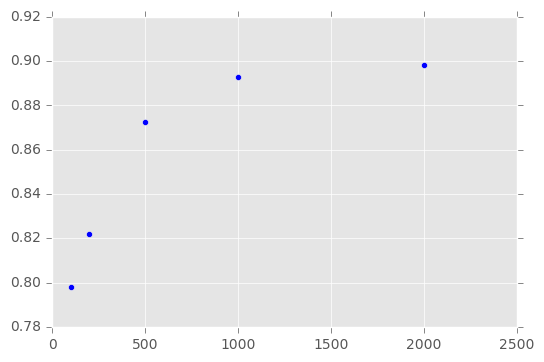

In [33]:
#Scatterplot for SPAM

plt.scatter(spamsamples, spam_percentages)
plt.show()

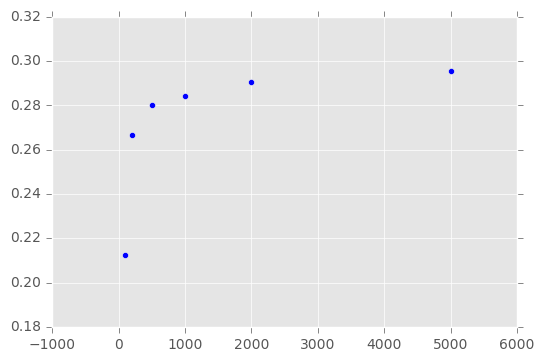

In [34]:
#Scatterplot for CIFAR  

plt.scatter(cifarsamples, cifar_percentages)
plt.show()

Problem 3) 
Best C value was .0000001
Values I tried were [0.000000001,0.0000001,0.00001,0.001,0.1,1.0,100.0, 10000.0, 1000000.0]
Corresponding percentages were [0.3978, 0.9127, 0.9077, 0.9058, 0.9058, 0.9058, 0.9058, 0.9058, 0.9058]

Problem 4)

Best C value was 10
Values I tried were [0.000000001,0.0000001,0.00001,0.001,0.1,1.0, 10]

Corresponding percentages were [0.70997673310346765, 0.70997673310346765, 0.70997673310346765, 0.75193040488137619, 0.79659518403274188, 0.80220297330380586, 0.80355619095674613]

Problem 5) 

For my Kaggle score, I changed several things in feature.py. First off i changed it so that the dictionary where it searched for instances of a word were all in lower case. That way "prescription" and "Prescription" would be in the same feature. My second change was that I generated features based on the most common words in spam. I made a list of the top 1500 words found in the spam training and made a list of the top 1500 words in ham. I also made a list of the top 50 words in the English language. I for looped through the top 1500 words in spam and added all words not found in the ham list as features.

MNIST KAGGLE =	
Patrick Chenglo
0.94140

SPAM KAGGLE = 
Patrick Chenglo
0.82582


CODE BELOW

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [2]:
mat_mnist = sio.loadmat('hw01_data/mnist/train.mat')
mat_spam = sio.loadmat('hw01_data/spam/spam_data.mat')
mat_cifar = sio.loadmat('hw01_data/cifar/train.mat')

In [3]:
mnist_train = mat_mnist['trainX']
cifar_train = mat_cifar['trainX']
train = mat_spam['training_data']
labels = mat_spam['training_labels']
spam_tuples = []
for i in range(0, len(train)):
    spam_tuples.append((train[i], labels[0][i]))
spam_train = np.array(spam_tuples)
np.random.shuffle(mnist_train)
np.random.shuffle(cifar_train)
np.random.shuffle(spam_train)

In [4]:
#Setting aside validation set
mnist_valid = mnist_train[0:10000]
mnist_train = mnist_train[10000::]
cifar_valid = cifar_train[0:5000]
cifar_train = cifar_train[5000::]
spam_valid = spam_train[0:1034]
spam_train = spam_train[1034::]


In [5]:
mnistsamples = [100,200,500,1000, 2000, 5000, 10000]
mnistXY = []

for sample in mnistsamples:
    mnistsample = mnist_train[0:sample]
    mnist_Y = [item[-1] for item in mnistsample]
    mnist_X = mnistsample[:,:-1]
    mnistXY.append((mnist_X, mnist_Y))

cifarsamples = [100,200,500,1000,2000 , 5000]
cifarXY = []

for sample in cifarsamples:
    cifarsample = cifar_train[0:sample]
    cifar_Y = [item[-1] for item in cifarsample]
    cifar_X = cifarsample[:,:-1]
    cifarXY.append((cifar_X, cifar_Y))
    
spamsamples = [100,200,500,1000,2000]
spamXY = []

for sample in spamsamples:
    spamsample = spam_train[0:sample]
    spam_Y = [item[1] for item in spamsample]
    spam_X = [item[0] for item in spamsample]
    spamXY.append((spam_X, spam_Y))


In [6]:
correct = [item[-1] for item in mnist_valid]
mnist_input = mnist_valid[:,:-1]
percentages = []

for size in mnistXY:
    mnist_clf = svm.SVC(kernel='linear', C = 1.0)
    mnist_clf.fit(size[0], size[1])
    predictions = mnist_clf.predict(mnist_input)
    counter = 0
    for i in range(0, len(predictions)):
        if predictions[i] == correct[i]:
            counter += 1
    percent = float(counter) / len(predictions)
    print("Correct rate:")
    print(percent)
    percentages.append(percent)

    

Correct rate:
0.7799
Correct rate:
0.812
Correct rate:
0.8597
Correct rate:
0.8787
Correct rate:
0.8894
Correct rate:
0.9058
Correct rate:
0.9028


In [7]:
mnist_percentages = percentages

In [8]:
correct = [item[-1] for item in cifar_valid]
cifar_input = cifar_valid[:,:-1]
cifar_percentages = []

for XY in cifarXY:
    cifar_clf = svm.SVC(kernel='linear', C = 1.0)
    cifar_clf.fit(XY[0], XY[1])
    predictions = cifar_clf.predict(cifar_input)
    counter = 0
    for i in xrange(0, len(predictions)):
        if predictions[i] == correct[i]:
            counter += 1
    percent = float(counter) / len(predictions)
    print("Correct rate:")
    print(percent)
    cifar_percentages.append(percent)

print cifar_percentages

Correct rate:
0.2126
Correct rate:
0.2666
Correct rate:
0.28
Correct rate:
0.2844
Correct rate:
0.2906
Correct rate:
0.2956
[0.2126, 0.2666, 0.28, 0.2844, 0.2906, 0.2956]


In [9]:
correct = [item[1] for item in spam_valid]
spam_input = [item[0] for item in spam_valid]
spam_percentages = []

for XY in spamXY:
    spam_clf = svm.SVC(kernel='linear', C = 1.0)
    spam_clf.fit(XY[0], XY[1])
    predictions = spam_clf.predict(spam_input)
    counter = 0
    for i in xrange(0, len(predictions)):
        if predictions[i] == correct[i]:
            counter += 1
    percent = float(counter) / len(predictions)
    print("Correct rate:")
    print(percent)
    spam_percentages.append(percent)

print spam_percentages

Correct rate:
0.797872340426
Correct rate:
0.822050290135
Correct rate:
0.872340425532
Correct rate:
0.892649903288
Correct rate:
0.898452611219
[0.7978723404255319, 0.8220502901353965, 0.8723404255319149, 0.8926499032882012, 0.8984526112185687]


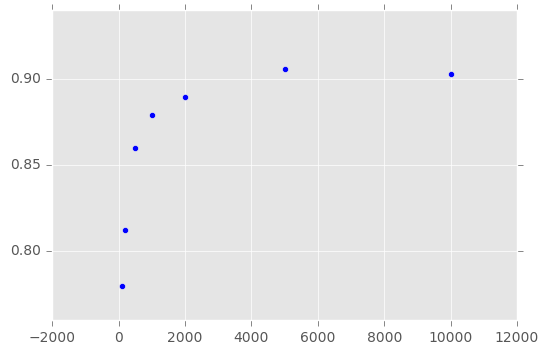

In [10]:
#Graph for MNIST

plt.scatter(mnistsamples, mnist_percentages)
plt.show()

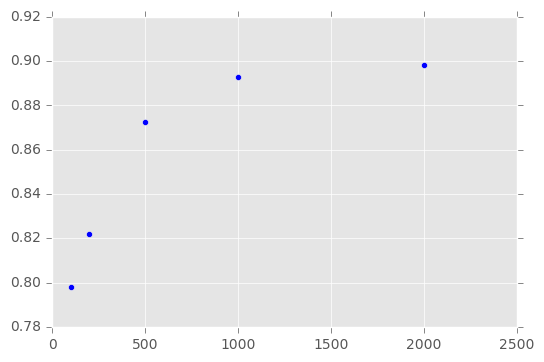

In [11]:
#Graph for SPAM

plt.scatter(spamsamples, spam_percentages)
plt.show()

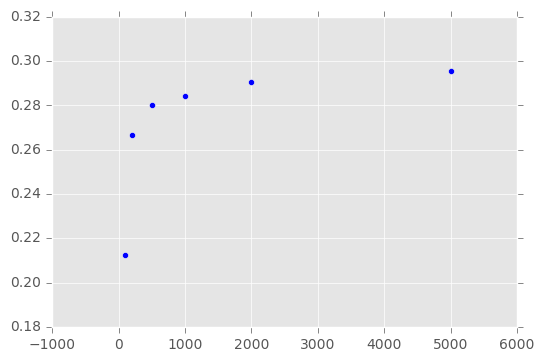

In [12]:
#Graph for CIFAR  

plt.scatter(cifarsamples, cifar_percentages)
plt.show()

In [18]:
c_values = [0.000000001,0.0000001,0.00001,0.001,0.1,1.0,100.0, 10000.0, 1000000.0]
correct = [item[-1] for item in mnist_valid]
c_percentages = []
for c in c_values:
    mnist_clf = svm.SVC(kernel='linear', C = c)
    mnist_clf.fit(mnistXY[6][0], mnistXY[6][1])
    predictions = mnist_clf.predict(mnist_input)
    counter = 0
    for i in range(0, len(predictions)):
        if predictions[i] == correct[i]:
            counter += 1
    percent = float(counter) / len(predictions)
    print(c)
    print(percent)
    c_percentages.append(percent)
print c_percentages

1e-09
0.3978
1e-07
0.9127
1e-05
0.9077
0.001
0.9058
0.1
0.9058
1.0
0.9058
100.0
0.9058
10000.0
0.9058
1000000.0
0.9058
[0.3978, 0.9127, 0.9077, 0.9058, 0.9058, 0.9058, 0.9058, 0.9058, 0.9058]


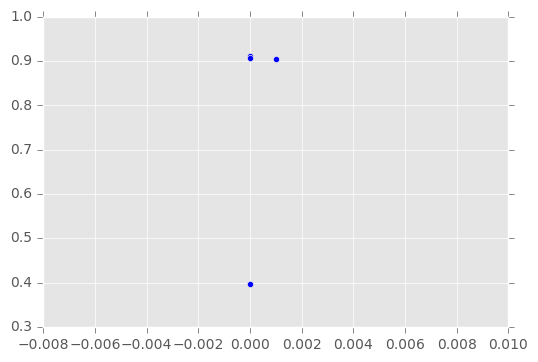

In [19]:
plt.scatter(c_values[:4], c_percentages[:4])
plt.show()

Best C value was .0000001
Values I tried were [0.000000001,0.0000001,0.00001,0.001,0.1,1.0,100.0, 10000.0, 1000000.0]
Corresponding percentages were [0.3978, 0.9127, 0.9077, 0.9058, 0.9058, 0.9058, 0.9058, 0.9058, 0.9058]

In [20]:
mat_feature = sio.loadmat('hw01_data/spam/spam_data.mat')
train = mat_feature['training_data']
labels = mat_feature['training_labels']
spam_tuples = []
for i in range(0, len(train)):
    spam_tuples.append((train[i], labels[0][i]))
spam_train = np.array(spam_tuples)
np.random.shuffle(spam_train)
X = [item[0] for item in spam_train]
Y = [item[1] for item in spam_train]
X = np.array(X)
Y = np.array(Y)

In [35]:
#K fold cross validation.After changing feature.py I did alot of diffferent c values and narrowed 
#it to this range

k_c_values = [ 1 , 2 , 3, 4, 5, 6, 7, 8, 9, 10]
k_c_percent = []

for c in k_c_values:
    clf = svm.SVC(kernel='linear', C=c)
    k_fold = KFold(n_splits=5)
    scores = cross_val_score(clf, X.astype(float), Y, cv=k_fold, n_jobs = 1)
    k_c_percent.append(scores.mean())
    print((c, scores.mean()))

print(k_c_percent)
        
        
                
                
        
    

(1, 0.92265635074145713)
(2, 0.92091609901045612)
(3, 0.91917659481026737)
(4, 0.91820928993916962)
(5, 0.91743634307926636)
(6, 0.9180171745204122)
(7, 0.91627785720292665)
(8, 0.91801829581663075)
(9, 0.91647184144871474)
(10, 0.91724609648753952)
[0.92265635074145713, 0.92091609901045612, 0.91917659481026737, 0.91820928993916962, 0.91743634307926636, 0.9180171745204122, 0.91627785720292665, 0.91801829581663075, 0.91647184144871474, 0.91724609648753952]


Best C value was 10
Values I tried were [0.000000001,0.0000001,0.00001,0.001,0.1,1.0, 10]

Corresponding percentages were [0.70997673310346765, 0.70997673310346765, 0.70997673310346765, 0.75193040488137619, 0.79659518403274188, 0.80220297330380586, 0.80355619095674613]

In [23]:
test_mnist = sio.loadmat('hw01_data/mnist/test.mat')['testX']


In [24]:
mnist_train_all = mat_mnist['trainX']
mnist_all_Y = [item[-1] for item in mnist_train_all]
mnist_all_X = mnist_train_all[:,:-1]


mnist_clf = svm.SVC(kernel='linear', C = 0.0000001)
mnist_clf.fit(mnist_all_X, mnist_all_Y)
predictions = mnist_clf.predict(test_mnist)

In [25]:
mnist_test_predictions = predictions
mnist_indexed = []
for i in xrange(0, len(mnist_test_predictions)):
    mnist_indexed.append([i, mnist_test_predictions[i]])
mnist_indexed = np.array(mnist_indexed)

In [26]:
with open("mnist_predict.csv", "wb") as f:
    f.write('Id,Category\n')
    np.savetxt(f, mnist_indexed, fmt='%i', delimiter=',')


In [27]:
mat_feature = sio.loadmat('hw01_data/spam/spam_data.mat')
train = mat_feature['training_data']
labels = mat_feature['training_labels']
spam_tuples = []
for i in range(0, len(train)):
    spam_tuples.append((train[i], labels[0][i]))
spam_train = np.array(spam_tuples)
np.random.shuffle(spam_train)
X = [item[0] for item in spam_train]
Y = [item[1] for item in spam_train]
X = np.array(X)
Y = np.array(Y)

In [28]:
test_spam_clf = svm.SVC(kernel='linear', C=1.115)
test_spam_clf.fit(X.astype(float), Y)

SVC(C=1.115, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
test_spam = sio.loadmat('hw01_data/spam/spam_data.mat')['test_data']
spam_predictions = test_spam_clf.predict(test_spam)
spam_indexed = []
for i in range(0, len(spam_predictions)):
    spam_indexed.append([i, spam_predictions[i]])
spam_indexed = np.array(spam_indexed)

In [30]:
with open("spam_predict.csv", "wb") as f:
    f.write(b'Id,Category\n')
    np.savetxt(f, spam_indexed, fmt='%i', delimiter=',')  


MNIST KAGGLE =	
Patrick Chenglo
0.94140

SPAM KAGGLE = 
Patrick Chenglo
0.82582
 
